# Time Series Analysis of Southern Water Corp Surjek's pump readings to develop Multivariate Regression Model to predict pump failure signals.

### Presenter: Sanju Timilsina
#### Date: July 12, 2020
#### Springboard Data Analytics Career Track

### Problem Statement : 
Through the increased demand for desalinated water, SW Corp had to maximize availability of its 
production units which has resulted in increase in Revenue for 2013-2014 but also resulted in premature pump
degradation for Surjek.This premature pump degration has resulted in increase in annual maintenance cost 
by ~$142.5 Million (56.8%)(2) and overall cost to produce ~$38 /ML (112.9%)(3) as a result of (4) months maintenance 
outage have placed SW Corp’s break-even point into downward shift requiring either compromise in production or 
identifying proactive asset  degradation strategies. And in this case study we will be analyzing Pump's reading raw data and rolling standard deviation data to identify failure signals. 

Source: 
1:SW Corp Technical Presentation( https://onedrive.live.com/edit.aspx?cid=080c62faf3481614&page=view&resid=80C62FAF3481614!2734&parId=80C62FAF3481614!2718&app=PowerPoint)
2:SW Corp financial analysis (https://onedrive.live.com/edit.aspx?cid=080c62faf3481614&page=view&resid=80C62FAF3481614!2662&parId=80C62FAF3481614!2650&app=Excel)
3:SW corp Economic analysis (https://onedrive.live.com/edit.aspx?cid=080c62faf3481614&page=view&resid=80C62FAF3481614!2680&parId=80C62FAF3481614!2679&app=PowerPoint)
4:SW corp statistical analysis.(https://onedrive.live.com/edit.aspx?cid=080c62faf3481614&page=view&resid=80C62FAF3481614!2698&parId=80C62FAF3481614!2682&app=PowerPoint)


-----------------------------------------

### Metadata: 


**Data set**: 'DF_Raw_Data.csv' and 'DF_Rolling_Stdev.csv'

**Columns**: 10(8 different Pump readings of Surjek with PUMP FAILURE (0 and 1) and TIMEFRAME (DD/MM/YYYY)).

**Rows**: 2453 

This case study is divided into two Statistical analyis. 
    
    
    1) Exploratory Data Analysis: Where we will perform Descriptive Statistical Analysis to identify the size,
        type, mean, median and quartiles which will help us to identify if any skewness (outliers) in the 
        dataframe.In this analysis we will be using  Seaborn boxplot to visualize the spread of dataframe and    identify outliers. Since, we are tying to identify the predictive signals of pump failure, which meand the abnormalities in the readings, it is obvious that we will have outliers as indication of pump failure.
        Hence, in this case we will not remove the outliers from the dataset. Hovever to make our 
        Timeseries plotting more uniform we will be using Rolling Standard Deviation data set with an 
        interval of 30 seconds. 
        
    2) Multivariate regression Model:In this data analysis, we will use OLS Regression Model in the 
        statsmodel.api library, to create a regression equation that models the Pump Failure (Y-Variable) against 
        all the independent variables, which include every other variable that is not PUMP FAILURE (1 or 0).
        We will be using Seaborn (heatmap) with (corr) function which will give us R- Squared values. 
        R-Squared colser to 1 = highest correlation w.r.t. pump failure. We will use the correlation coefficient 
        values of each pumps to calculate multivariate regression model by using OLS Regression Model to 
        predict pump failure patterns and validate that prediction by calculating coefficient matrix.

## Part I: <span style="color:blue">Exploratory Data Analysis : Descriptive Statistical Analysis</span>

### Step 1: <span style="color:green">Import Libraries</span> 
 

**Matplotlib** - This is Python's basic plotting library.
We will use pyplot and dates function collections from matplotlib throughout this case study  **'%matplotlib inline'** is also included so that graphs are easily included in the notebook. We will also need to import DateFormatter from matplotlib as well.

**Seaborn** - This library will enable us to create aesthetically pleasing plots.

**Pandas** - This library will enable us to import, view and manipulate your data in a data frame.

**statsmodels.api** - This library will enable us to create statistical models. We will need this library when perfroming regession analysis in Part 2 of this case study.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as md 
from matplotlib.dates import DateFormatter
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm 
import numpy as np




---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 


i. Import 'DF_Raw_Data.csv', pass header = 1 as an argument.

ii. Print descriptive statistics on your dataframe using **.describe()** and **.info()**

iii. Set "TIMEFRAME" as the index on dataframe. 

In [2]:
# Importing data file from PC
df = pd.read_csv('DF_Raw_Data.csv')

In [3]:
# Exploring first 5 rows of the data frame.
df.head()

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Raw,9/12/2014 0:00,41.30,41.16,98,207,54,3.86,74.84,0
1,Raw,9/12/2014 0:01,42.40,41.39,92,212,46,3.71,75.25,0
2,Raw,9/12/2014 0:02,41.43,41.15,80,207,55,3.15,74.82,0
3,Raw,9/12/2014 0:03,42.21,40.93,83,190,49,3.00,74.42,0
4,Raw,9/12/2014 0:04,40.51,43.32,90,195,50,3.34,78.76,0


In [64]:
# Exploring number of rows and columns
df.shape

(2453, 10)

In [4]:
# Summary Statistics
df.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,41.802629,41.796702,90.796576,202.851610,50.226661,3.540897,76.015149,0.021199
std,3.656576,3.654873,10.217885,22.683977,5.298203,0.579055,6.651633,0.144075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.050000,41.000000,85.000000,191.000000,48.000000,3.220000,74.560000,0.000000
50%,42.100000,42.140000,91.000000,203.000000,51.000000,3.480000,76.620000,0.000000
75%,43.140000,43.130000,97.000000,215.000000,53.000000,3.780000,78.470000,0.000000
max,45.900000,45.840000,124.000000,264.000000,65.000000,7.560000,83.450000,1.000000


In [5]:
# Data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 10 columns):
Data Source                2453 non-null object
TIMEFRAME (DD/MM/YYYY)     2453 non-null object
Volumetric Flow Meter 1    2453 non-null float64
Volumetric Flow Meter 2    2453 non-null float64
Pump Speed (RPM)           2453 non-null int64
Pump Torque                2453 non-null int64
Ambient Temperature        2453 non-null int64
Horse Power                2453 non-null float64
Pump Efficiency            2453 non-null float64
PUMP FAILURE (1 or 0)      2453 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 191.7+ KB


In [6]:
# To check the columns of the data frame
df.columns 

Index(['Data Source', 'TIMEFRAME (DD/MM/YYYY)', 'Volumetric Flow Meter 1',
       'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ',
       'Ambient Temperature', 'Horse Power', 'Pump Efficiency',
       'PUMP FAILURE (1 or 0)'],
      dtype='object')

In [7]:
# Removing Data Source columns from data set
drop_df = df.drop(['Data Source'], axis = 1)
drop_df.head()


,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,9/12/2014 0:00,41.30,41.16,98,207,54,3.86,74.84,0
1,9/12/2014 0:01,42.40,41.39,92,212,46,3.71,75.25,0
2,9/12/2014 0:02,41.43,41.15,80,207,55,3.15,74.82,0
3,9/12/2014 0:03,42.21,40.93,83,190,49,3.00,74.42,0
4,9/12/2014 0:04,40.51,43.32,90,195,50,3.34,78.76,0


In [8]:
# Setting TIME FRAME as index, so that it doesnot gets plotted as column
i_df = drop_df.set_index('TIMEFRAME (DD/MM/YYYY)') 
i_df.head()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
TIMEFRAME (DD/MM/YYYY),,,,,,,,
9/12/2014 0:00,41.30,41.16,98,207,54,3.86,74.84,0
9/12/2014 0:01,42.40,41.39,92,212,46,3.71,75.25,0
9/12/2014 0:02,41.43,41.15,80,207,55,3.15,74.82,0
9/12/2014 0:03,42.21,40.93,83,190,49,3.00,74.42,0
9/12/2014 0:04,40.51,43.32,90,195,50,3.34,78.76,0


---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

i) Creating a boxplot from dataframe using **matplotlib and seaborn** with all the variables plotted out. Note: do any particular variables stand out to you? Title your visualization **"Boxplot for all attributes"** and set the boxplot size to 25 x 5.

### Please put your code here


# Boxplot for all attributes

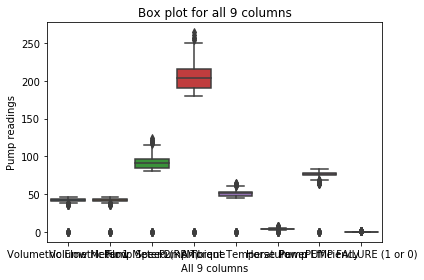

In [9]:
all_boxplot = sns.boxplot(data = i_df)
plt.rcParams['figure.figsize'] = (25,5) # expland
plt.ylabel('Pump readings')
plt.xlabel('All 9 columns')
plt.title('Box plot for all 9 columns')
plt.tight_layout()
# how do i increase font size
# how do i set title


### Key Insights:  Due to various range of measurment units for each variables, most of the variables are tightly packed and visibly not well distributed. So we need to filter those variables that are showing high variance and only plot others seperately. In this box plot we can clearly see that, Pump Speed(RPM) and Pump Torque have high variance in comaprisions to others so, we will exclude these (2) variables and plot a box plot again to better visualize the distribution og other variables. 

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Create a Filtered Boxplot</span>  
i) Creating a data frame with filtered columns, i.e without Pump Speed and Pump Torque. And Assining a variable df_filt to that data frame. Then creating a boxplot for df_filt.

In [10]:
# Getting list of columns in data frame
list(i_df)


['Volumetric Flow Meter 1',
 'Volumetric Flow Meter 2',
 'Pump Speed (RPM)',
 'Pump Torque ',
 'Ambient Temperature',
 'Horse Power',
 'Pump Efficiency',
 'PUMP FAILURE (1 or 0)']

In [67]:
# filtered columns, i.e without Pump Speed and Pump Torque
df_filt = i_df[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 
                    'Ambient Temperature', 'Horse Power', 'Pump Efficiency', 'PUMP FAILURE (1 or 0)']]
plt.rcParams['figure.figsize'] = (25,5)


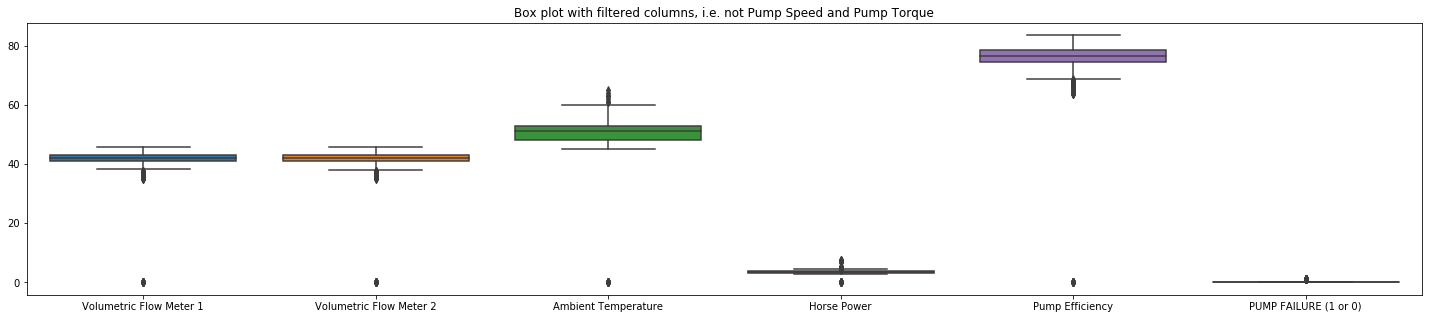

In [68]:
sns.boxplot(data = df_filt)
plt.title('Box plot with filtered columns, i.e. not Pump Speed and Pump Torque')
plt.show()

### Key Insights:  Now in this box plot we can see that Ambient Temperature and Pump Efficiency are also showing varience in its data, suggesting us to take a closer look at these two variables as well along with Pump speed and Pump Torque.

---------------------------------------------------------------------------

### Step 5: <span style="color:green">Filter Your Boxplot by Column Value</span> 

i) Creating a (2) box plot using raw data (i_df) with respect to i) failure mode == 1 and Failure mode ==0. To creat a2 boxplot side by side we are using Shared X- axis and looping through them while plotting.


What variables seem to have the largest variation when the Pump has failed?


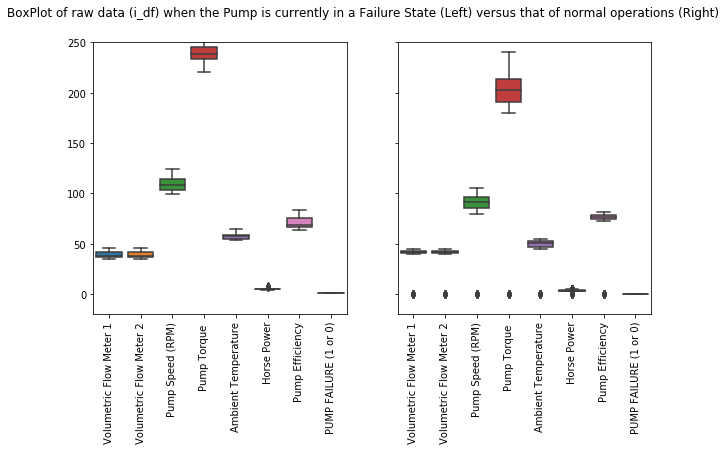

In [13]:
# Creating (2) boxplots side by side with sahred x axis

# Creating fail and not fail dataframe
fail = i_df[i_df['PUMP FAILURE (1 or 0)'] == 1] #data frame when pump failure = 1
not_fail = i_df[i_df['PUMP FAILURE (1 or 0)'] == 0] #data frame when pump failure = 0

#Setting parameters for plot
mpl.rcParams['figure.figsize'] = (10,5) # setting size of figure
fig, axes = plt.subplots(1,2, sharey = True) # fig = figure, axes = , sharey = to share or not to share the x and y axis conditions in all figure
fig.suptitle('BoxPlot of raw data (i_df) when the Pump is currently in a Failure State (Left) versus that of normal operations (Right)')

# Plotting 
sns.boxplot(data = fail, orient = 'v', ax = axes[0])
sns.boxplot(data=not_fail, orient='v', ax=axes[1])

# Looping through the axes
for ax in fig.axes:
    mpl.pyplot.sca(ax) # sca = 
    plt.ylim(-20,250) # giving y-axis values
    plt.xticks(rotation=90) # giving x axis orientation
    
plt.show()


### Key insights: We can see from above box plot that during pump failure = 1 (left), Pump Torque, 
Pump Speed and Pump Efficiency are showing higher varience than others. Among which Pump Torque has 
significantly higher shigt in readings than in normal state(right). Suggesting these (3) variables have 
higher number of outliers in the pump readings.

---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identifying Quartiles and Analyzing Outlier removed data frame w.r.t. failure mode</span> 

i) Calculating q1 and q3. q1 should contain the 25th percentile for all columns in the dataframe while Q3 contains the 75th percentile for all the columns in the dataframe.

ii) Calculating interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe.

In [14]:
# Calculating q1 and q3 of raw_data (i_df) by using quantile() function from pandas
q1 = i_df.quantile(0.25) # 25th percentile
q3 = i_df.quantile(0.75) # 75th percentile
print(q1)
print(q3)


Volumetric Flow Meter 1     41.05
Volumetric Flow Meter 2     41.00
Pump Speed (RPM)            85.00
Pump Torque                191.00
Ambient Temperature         48.00
Horse Power                  3.22
Pump Efficiency             74.56
PUMP FAILURE (1 or 0)        0.00
Name: 0.25, dtype: float64
Volumetric Flow Meter 1     43.14
Volumetric Flow Meter 2     43.13
Pump Speed (RPM)            97.00
Pump Torque                215.00
Ambient Temperature         53.00
Horse Power                  3.78
Pump Efficiency             78.47
PUMP FAILURE (1 or 0)        0.00
Name: 0.75, dtype: float64


In [15]:
#q1, q3= np.percentile(i_df,[25,75]) # by using numpy 
#print(q1,q3)

In [16]:
# Calculating Inter quartile range (IQR)
IQR = q3 - q1
print(IQR)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


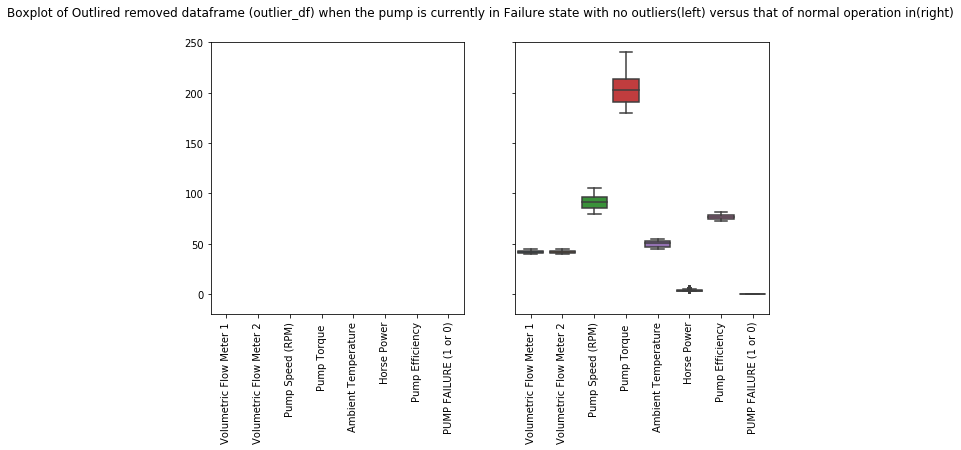

In [17]:
# 6:  Creating dataframe named outlier_df which is a i_df with all the outliers removed.
outlier_df = i_df[~((i_df < (q1 - 1.5 * IQR)) |(i_df > (q3 + 1.5 * IQR))).any(axis=1)] # Dataframe without outliers

#Setting parameters for plots fig size and number of subplots and title
mpl.rcParams['figure.figsize'] = (10,5)
fig, axes = plt.subplots(1,2, sharey = True) # fig = figure, axes = , sharey = to share or not to share the x and y axis conditions in all figure
fig.suptitle('Boxplot of Outlired removed dataframe (outlier_df) when the pump is currently in Failure state with no outliers(left) versus that of normal operation in(right)')

# Create new dataframe with Pump Failure = 1 and Pump Failure = 0
failed = outlier_df[outlier_df['PUMP FAILURE (1 or 0)'] == 1]
not_failed = outlier_df[outlier_df['PUMP FAILURE (1 or 0)'] == 0]

# Boxplots 
sns.boxplot(data = failed, orient = 'v', ax = axes[0])
sns.boxplot(data = not_failed, orient='v', ax=axes[1])

#Creating a loop to set same axis parameters in both plots
for ax in fig.axes:
    mpl.pyplot.sca(ax) 
    plt.ylim(-20,250)
    plt.xticks(rotation=90)
    
plt.show()


### Key Insights:

### Plot 1: Boxplot of outliers removed dataframe when Pump Failure mode = 1 , shows that there are no readings 
for any of the variables, because during the failure mode there is expected to be abnormalities in readings . Since , 
all the abnormalities(outliers) are removed from the data there is nothing to read.

### Plot 2: Boxplot of outliers removed dataframe when Pump Failure mode = 0, shows that the readings are normal.


---------------------------------------------------------------------------

### Step 7: <span style="color:green">Identify Outliers/ and analyzing if we should remove it or not</span> 

i) Calculating Total number of entries in raw data (i_df)
ii) Using the quartiles and IQR previously calculated, identifying the number of entries you'd have if we should remove the outliers.

ii) Finding proportion of outliers that exist in the dataset.


In [18]:
#Counting Rows and columns for raw data (i_df)
count_row = i_df.shape[0]  # gives number of row count
count_col = i_df.shape[1]  # gives number of col count
print(count_row)
print(count_col)

2453
8


In [19]:
#Identifying number of rows after removing outliers
outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2358 entries, 9/12/2014 0:00 to 10/12/2014 16:52
Data columns (total 8 columns):
Volumetric Flow Meter 1    2358 non-null float64
Volumetric Flow Meter 2    2358 non-null float64
Pump Speed (RPM)           2358 non-null int64
Pump Torque                2358 non-null int64
Ambient Temperature        2358 non-null int64
Horse Power                2358 non-null float64
Pump Efficiency            2358 non-null float64
PUMP FAILURE (1 or 0)      2358 non-null int64
dtypes: float64(4), int64(4)
memory usage: 165.8+ KB


In [20]:
#Finding Porportion of Outlier removed/ raw data frame(i_df) = ~96%
2358/2453 

0.9612719119445576

### Key Insights: 
When we had not removed any outliers from the dataset, we have: 2453 entries
When we removed all outliers from the dataset, we have: 2358 entries
The proportion of outliers which exist when compared to the dataframe are:  0.96( ~96%)
Since the ~96% of total data set are outliers, it would not make sence to remove outliers in this case. This also shows that, Descriptive Statistical analysis is very important process for any data analysis process, as it helps us to understand the distribution of dataset and identify and further analyze outliers. In this case, since we are trying to identify the abnormalities in the pump readings, it is expected to have outliers, which is a indication of pump failures.  

---------------------------------------------------------------------------

### Step 9: <span style="color:green">Ploting and Examining Each Columns for raw data (i_df)</span> 
   
Here, we will be Using a loop, to iterate through each of the Column Names and plot the data with Pump Failure as secondary Y axis. Use Tight_layout. 

**Note:** For each plot, ensure that you have a dual axis set up so you can see the Pump Behaviour (0 or 1) on the second Y-axis, and the attribute (e.g. Volumetric Flow Meter 1) on the first Y-Axis. 



In [21]:
list(i_df)

['Volumetric Flow Meter 1',
 'Volumetric Flow Meter 2',
 'Pump Speed (RPM)',
 'Pump Torque ',
 'Ambient Temperature',
 'Horse Power',
 'Pump Efficiency',
 'PUMP FAILURE (1 or 0)']

(2453, 8)


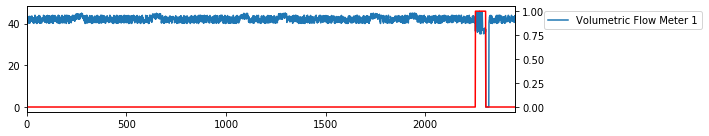

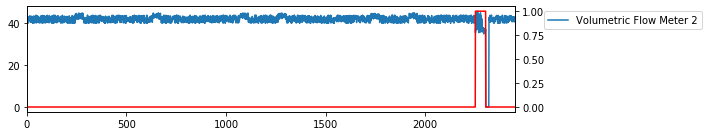

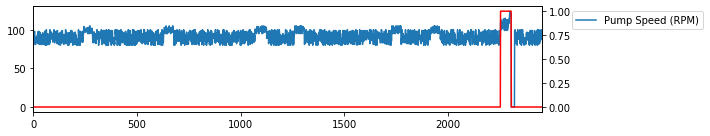

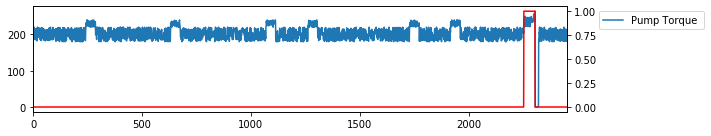

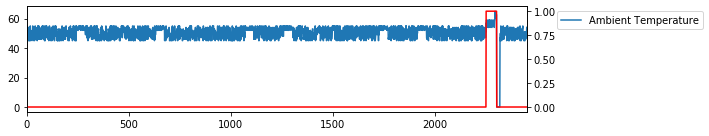

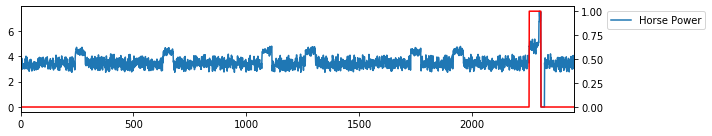

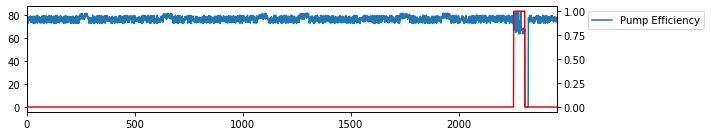

In [71]:
# Removing NA and resetting index
dataframe = i_df.dropna()
print(dataframe.shape)
dataframe = dataframe.reset_index()

# Filtering columns to seperate Pump failure
#filt = ['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2',  'Ambient Temperature', 'Horse Power', 'Pump Efficiency']

col_filter = dataframe[['Volumetric Flow Meter 1',
 'Volumetric Flow Meter 2',
 'Pump Speed (RPM)',
 'Pump Torque ',
 'Ambient Temperature',
 'Horse Power',
 'Pump Efficiency']]
pump_failure = dataframe['PUMP FAILURE (1 or 0)']
#colList = dataframe[filt].columns
mpl.rcParams['figure.figsize'] = (10,2)# setting figure size by giving row and columns parameters (i.e, length and breath which is 10 and 2 in this case)
#print(colList)

for col in col_filter:
    x_axis = dataframe[col].plot() # plotting first column from dataframe i.e. volumetric flow meter 1 as x axis
    secondary_axis = x_axis.twinx() # initiating secondary axis by twining x_axix
    secondary_axis.plot(pump_failure, 'red')
    
    # plot formatting
    x_axis.legend(bbox_to_anchor=(1.05,1), loc="upper left")
    min_Time = dataframe.index.min()
    max_Time= dataframe.index.max()
    plt.tight_layout()
    #plt.title("This is for attribute " + col + " over the time range index entries " + str(min_Time) + " " +  " to " + str(max_Time))
   
    plt.show()

### Key Insights: 
Plotting raw dataframe (i_df) for each individual variables against dual Y axis, one being the readings and other 
being the Pump Failure(0,1) as secondary axis shows that each variables had signal change in its readings at a point where actual Pump Failure occured (RED).

---

### Step 10: <span style="color:green">Create a Plotting for Pump Failures Over a Rolling Time Period</span> 

i) Apply a rolling standard deviation to the dataframe using a rolling window size of '30'.

ii) Re-plot all variables for the time period '10/12/2014 13:30' and '10/12/2014 14:45', focusing specifically on the first Pump “Failure”. 


In [50]:
# Importing Rolling stdev data
data_rolling = pd.read_csv('DF_Rolling_Stdev.csv')
data_rolling.head()
#data_rolling.shape


,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Rolling Stdev (30 Minute),9/12/14 0:00,1.04,0.96,5.54,11.70,3.40,0.32,1.74,0
1,Rolling Stdev (30 Minute),9/12/14 0:01,1.06,1.01,5.49,11.73,3.36,0.31,1.83,0
2,Rolling Stdev (30 Minute),9/12/14 0:02,1.06,1.03,5.62,11.94,3.40,0.31,1.87,0
3,Rolling Stdev (30 Minute),9/12/14 0:03,1.06,1.05,5.61,12.10,3.30,0.31,1.90,0
4,Rolling Stdev (30 Minute),9/12/14 0:04,1.07,1.03,5.61,12.31,3.36,0.30,1.88,0


In [49]:
# Removing Data Source column from axis =1
rolling_df = data_rolling.drop(['Data Source'], axis = 1) # to drop Data Source column
#rollingDF = i_df.rolling(30).std() if data is not rolling stdev

# Setting Time Frame as Index
#rolling_df.set_index('TIMEFRAME (DD/MM/YYYY)', inplace = True) # to have Time Frame column as index, inplace = True makes changes to original data frame i.e to rolling_df

In [59]:
# Filtering Time frame from "'10/12/14 13:30' and '10/12/14 14:45'" # have year in 2 digit in mac # loc: to filter for index. 
rolling_df_filt = rolling_df.loc[(rolling_df['TIMEFRAME (DD/MM/YYYY)'] >= "10/12/14 13:30")
                                 &(rolling_df['TIMEFRAME (DD/MM/YYYY)'] <="10/12/14 14:45")]

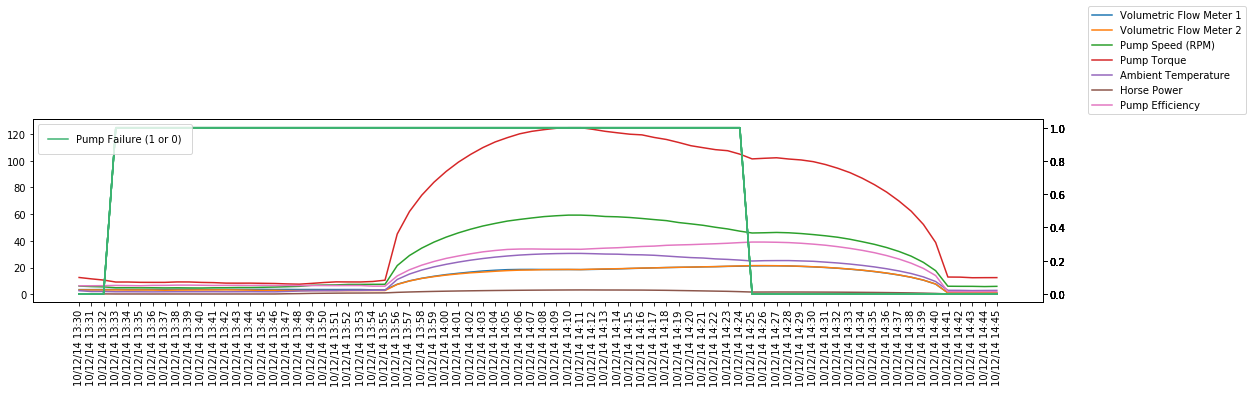

In [73]:
# filtering columns
r_col_filter = rolling_df[['Volumetric Flow Meter 1',
 'Volumetric Flow Meter 2',
 'Pump Speed (RPM)',
 'Pump Torque ',
 'Ambient Temperature',
 'Horse Power',
 'Pump Efficiency']]

# Setting parameters for figure
mpl.rcParams['figure.figsize'] = (15,4)# setting figure size by giving row and columns parameters (i.e, length and breath which is 10 and 2 in this case)

# plot formatting
fig = plt.figure() #initiating figure
ax = plt.axes()  
date_form = DateFormatter("%d/%m/%Y %H:%M:%S")# formatting date as dd/mm/yy hour:minutes:secondsfor x axis
ax.xaxis.set_major_formatter(date_form) # setting ax as x axis with date_form ( note: no values in date_form yet)

#Loop through the col_filter to plot each columns w.r.t. pump failure
for i in r_col_filter:
    ax.plot(rolling_df_filt['TIMEFRAME (DD/MM/YYYY)'], rolling_df_filt[i], label=i) # passing rolling_df_filt['TIMEFRAME (DD/MM/YYYY) as x axis (ax) and first item in col list as y axix 
    ax2 = ax.twinx() # creating ax2 for secondary axis which will share x axis as ax
    ax2.plot(rolling_df_filt['TIMEFRAME (DD/MM/YYYY)'], rolling_df_filt['PUMP FAILURE (1 or 0)'], 'mediumseagreen', label='Pump Failure (1 or 0)')
    # plotting Timeframe as x axis and Pump failure as y axis in ax2
    ax.xaxis.set_tick_params(rotation=90) 

    plt.tight_layout()
    minTime = rolling_df_filt.index.min()
    maxTime= rolling_df_filt.index.max()
    #plt.title("This is a rolling deviation plot over the time range index entries " + str(minTime) + " " +  " to " + str(maxTime))

ax.legend(bbox_to_anchor=(1.04,1), loc="lower left")   
ax2.legend(loc='upper left', borderpad=1)
plt.show()



---

## Part II: <span style="color:blue">Multivariate Regression Model/Inferential Statistical Analysis</span>


Creating a heatmap using Seaborn's heatmap function along with correlation function to get the r- squated values. R-Squared value closer to 1 signifies strong association with Pump Failure.

### Step 11: <span style="color:purple">Creating a Heatmap and Barchart for raw dataframe</span> 
i) Using Seaborn's heatmap function, create a heatmap for both raw data and rolling standard deviation data, that clearly shows the correlations (including R Squared) for all variables (excluding those with consistent 0 values such as Ammonia Flow Rate).

Link: (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [28]:
i_df.columns

Index(['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2',
       'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature',
       'Horse Power', 'Pump Efficiency', 'PUMP FAILURE (1 or 0)'],
      dtype='object')

In [29]:
# First Heat map Using Raw Data
filt_columns = i_df[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2',
       'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature',
       'Horse Power', 'Pump Efficiency']]
pump_failure = i_df['PUMP FAILURE (1 or 0)']

In [30]:
filt_columns.head()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency
TIMEFRAME (DD/MM/YYYY),,,,,,,
9/12/2014 0:00,41.30,41.16,98,207,54,3.86,74.84
9/12/2014 0:01,42.40,41.39,92,212,46,3.71,75.25
9/12/2014 0:02,41.43,41.15,80,207,55,3.15,74.82
9/12/2014 0:03,42.21,40.93,83,190,49,3.00,74.42
9/12/2014 0:04,40.51,43.32,90,195,50,3.34,78.76


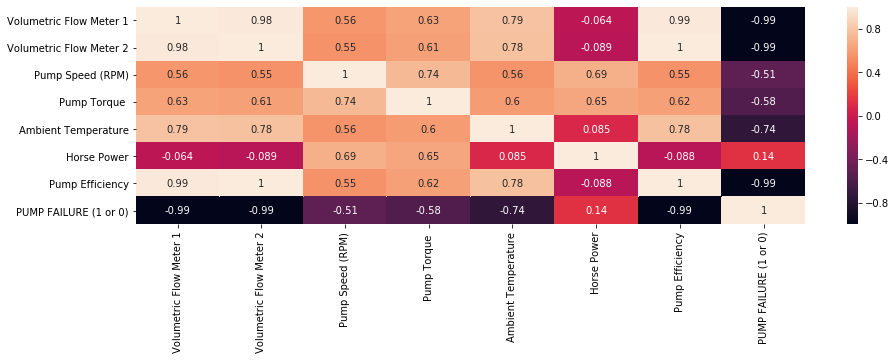

In [31]:
# Heat map for raw_data
i_df_corr = i_df.corr()
sns.heatmap(i_df_corr.corr(), annot = True)
plt.show()

### Key Insights: Heat map for raw data is showing that with R2 = 0.14, Horse power  is highly correlated with pump failure . However, with r-squared value such low we can grab any insights from this heat map. Se, we will have to look in to rolling standard deviation data for further clarity.

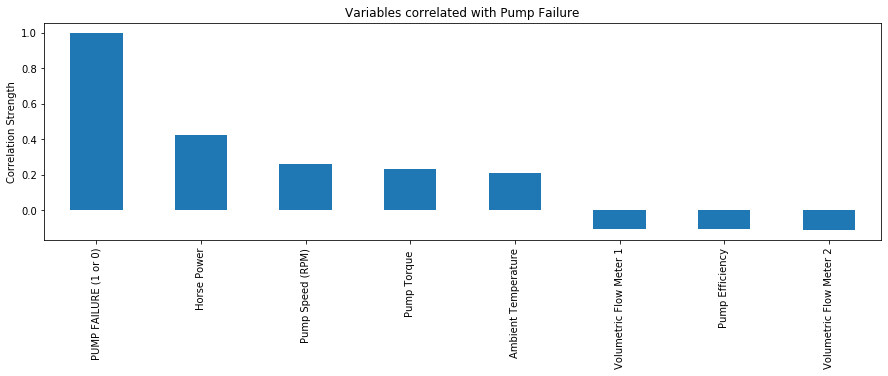

In [32]:
# Creating Barchart fo rraw data
raw_corr = i_df_corr.sort_values("PUMP FAILURE (1 or 0)", ascending=False)
raw_corr['PUMP FAILURE (1 or 0)'].plot(kind='bar')
plt.title("Variables correlated with Pump Failure")
plt.ylabel("Correlation Strength")
plt.show()

---

### Step 13: <span style="color:purple">Creating a Rolling Standard Deviation Heatmap</span> 
Previously, we created a correlation matrix using 'raw' dataframe. This time, use Rolling_Stdev_DF


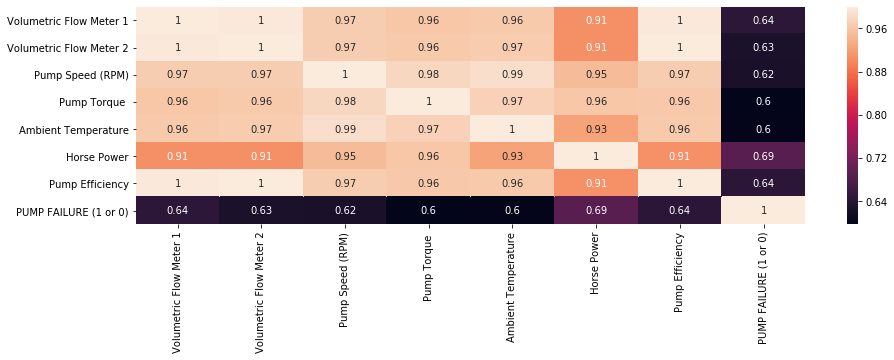

In [33]:
# Creating heat map for rolling stdev data
rolling_corr = rolling_df.corr()
sns.heatmap(rolling_corr, annot = True)
plt.show()

###  <span style="color:purple">Creating a Barplot of Correlated Features of rolling stdev data against its PUMP failure (0, 1) in descending order</span>

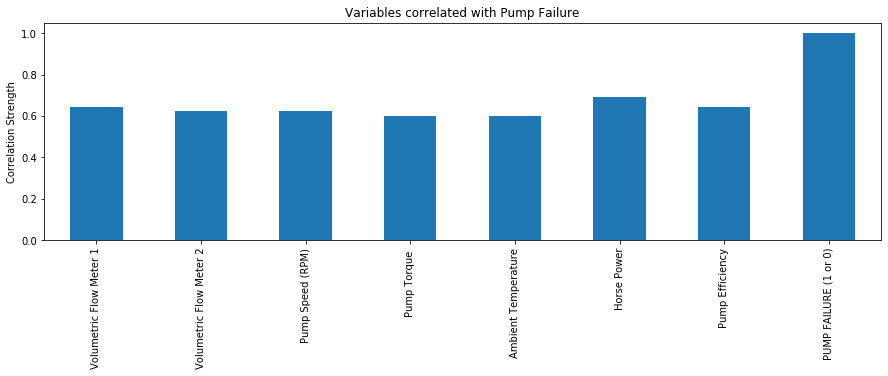

In [34]:
corr = rolling_corr.sort_values("PUMP FAILURE (1 or 0)", ascending=False)
rolling_corr['PUMP FAILURE (1 or 0)'].plot(kind='bar')
plt.title("Variables correlated with Pump Failure")
plt.ylabel("Correlation Strength")
plt.show()

### Key Insights: 
Heat map and bar chart for rolling standard deviation data shows that, with ~ more than 60,
r-squared value, all variables are somehow strongly associated with pump failure. Among which,with a R-square value of 0.69 horse power is showing stronger association w.r.t. pump failure.

### Creating a Multivariate Regression Model


For this step, we'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 14: <span style="color:purple">Use OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all the independent variables.
ii) And we repeated i) but this time we used the rolling standard deviation variables you created previously.To identify R Squared value for the model.


### Regression Model for Raw dataframe

In [35]:
# Regression model for raw data i_df where 
raw_x = i_df[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2',
       'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature',
       'Horse Power', 'Pump Efficiency']]

raw_y = i_df['PUMP FAILURE (1 or 0)']
raw_model = sm.OLS(raw_y,raw_x).fit()
raw_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared (uncentered):                   0.371
Model:                               OLS   Adj. R-squared (uncentered):              0.369
Method:                    Least Squares   F-statistic:                              206.1
Date:                   Tue, 14 Jul 2020   Prob (F-statistic):                   7.29e-241
Time:                           07:58:52   Log-Likelihood:                          1814.7
No. Observations:                   2453   AIC:                                     -3615.
Df Residuals:                       2446   BIC:                                     -3575.
Df Model:                              7                                                  
Covariance Type:               nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Volumetric Flow Meter 1    -0.0139      0.002     -7.666      0.000      -0.017      -0.010
Volumetric Flow Meter 2    -0.0178      0.003     -5.302      0.000      -0.024      -0.011
Pump Speed (RPM)            0.0027      0.001      3.305      0.001       0.001       0.004
Pump Torque                 0.0009      0.000      2.444      0.015       0.000       0.002
Ambient Temperature         0.0102      0.001     14.464      0.000       0.009       0.012
Horse Power                 0.0701      0.019      3.746      0.000       0.033       0.107
Pump Efficiency             0.0020      0.002      1.010      0.313      -0.002       0.006
==============================================================================
Omnibus:                     2053.340   Durbin-Watson:                   0.457
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56905.683
Skew:                           3.886   Prob(JB):                         0.00
Kurtosis:                      25.279   Cond. No.                     2.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression Model for rolling stdev datframe

In [36]:
# OLS regresion model for rolling st.dev data where x = column list and y = pump failure

rolling_x = rolling_df[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2',
       'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature',
       'Horse Power', 'Pump Efficiency']]

rolling_y = rolling_df['PUMP FAILURE (1 or 0)']
rolling_model = sm.OLS(rolling_y,rolling_x).fit()
rolling_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared (uncentered):                   0.774
Model:                               OLS   Adj. R-squared (uncentered):              0.773
Method:                    Least Squares   F-statistic:                              1195.
Date:                   Tue, 14 Jul 2020   Prob (F-statistic):                        0.00
Time:                           07:58:52   Log-Likelihood:                          3067.8
No. Observations:                   2452   AIC:                                     -6122.
Df Residuals:                       2445   BIC:                                     -6081.
Df Model:                              7                                                  
Covariance Type:               nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Volumetric Flow Meter 1     0.0650      0.010      6.414      0.000       0.045       0.085
Volumetric Flow Meter 2    -0.5695      0.020    -28.477      0.000      -0.609      -0.530
Pump Speed (RPM)           -0.0235      0.002    -12.253      0.000      -0.027      -0.020
Pump Torque                -0.0209      0.001    -25.204      0.000      -0.023      -0.019
Ambient Temperature         0.0153      0.003      4.877      0.000       0.009       0.021
Horse Power                 0.7928      0.022     35.982      0.000       0.750       0.836
Pump Efficiency             0.3243      0.012     26.478      0.000       0.300       0.348
==============================================================================
Omnibus:                      981.646   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47251.698
Skew:                           1.134   Prob(JB):                         0.00
Kurtosis:                      24.386   Cond. No.                         418.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Key Insights: 
R-squared value for raw data (0.371) and rolling standard deviation data (0.77) suggest that ,
Creating a regression model for rolling standard deviation data will show higher correlation towards pump failure. 
R-squared value of all 8 variables when modeled against independent variable Pump Failure (0,1)
indicates that Horse Power(0.79), Pump Efficiency(0.32),Volumetric Flow Meter 1(0.065) have higher 
correlation coefficient indicating highly correlated to pump failure.


### Step 15: <span style="color:purple">Validate Predictions</span> 
i) First we will use the regression equation that we created in the previous step and apply the .predict() function to the rolling standard deviation dataframe to predict the the Pump Failure Event.  

ii) Then we will Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'

**Note:** Please ensure all axes are clearly labelled and ensure that you use Dual Axes to plot this. Make the line widths wider than 1 so the plots are easier to see. We have provided the initial figure size.

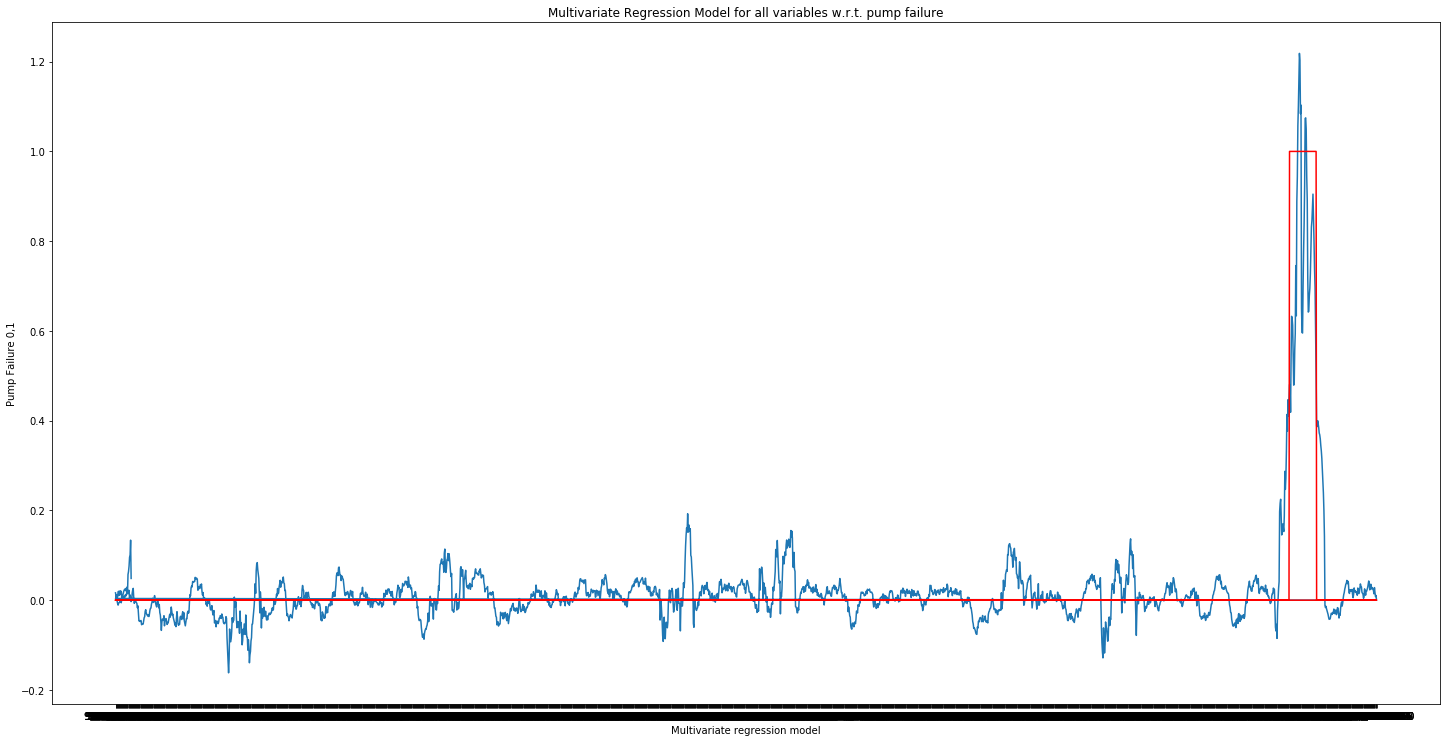

In [62]:
# Prediction validation for rolling model against Pump Failure(0,1)
y_prediction = rolling_model.predict(rolling_x)
plt.figure(figsize = (20,10))
plt.plot(y_prediction) # to plot predicted Pump Failure signals
plt.plot(rolling_y, color = 'red')
plt.tight_layout()
plt.xlabel('Multivariate regression model')
plt.ylabel('Pump Failure 0,1')
plt.title('Multivariate Regression Model for all variables w.r.t. pump failure')
plt.show()

### Key Insights:
Using Multivariate Regression Model(equation) to predict dependent veriables(rolling_x) indicates 
that there were multiple pre-failure signals(small rise and fall of peaks ) before pump actually failed 
(the strong signal on the right cornor). We then compared that predicted signal with real 
failure signal(rolling_y,Red)and both the signals aligned with each other. So, we can say that there
was a strong pump failure signal at that particular time frame 
(10/12/14 13:30' and '10/12/14 14:45)(Ref: step 10).

### Conclusion: 
With the help of Exploratory Data Analysis( Descriptive Statistical Analysis) and
Multivariate Regression Model(Inferential Statistical Analysis), we were able to identify variance 
in dataset(outliers). To give some uniformlity to the data we calculated rolling standared deviation 
with the interval of 30. We then calculated Correlation coefficient and compared R-squared values for
each pump with respect to Pump Failure(1,0). We used those correlation coefficient values to calculate
Multivariate Regression Model by using OLS Model from Statistical models. Which helped us to predict the 
failure signals and then we used .predict() function to make prediction for failure signal and compare it 
with the actual failure signals. 

By looking at the plots of the above statistical analysis we were able to identify prefailure signals and 
actual failure signals for each individual dependent variables(Pump readings) w.r.t. its independent variables 
i.e. Pump Failure(0,1). R-squared value for raw data (0.371) and rolling standard deviation data (0.77) suggest that , Creating a regression model for 
rolling standard deviation data will show higher correlation towards pump failure. R-squared value of all 
8 variables when modeled against independent variable Pump Failure (0,1) indicates that Horse Power(0.79),
Pump Efficiency(0.32),Volumetric Flow Meter 1(0.065) have higher correlation coefficient indicating highly 
correlated to pump failure. Hence, SW corp should shift their attention on identifying the reasons for those 
pump failure and and take preventive actions.



# THANK YOU ! Happy Learning !